In [11]:
import warnings
warnings.filterwarnings('ignore')

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [5]:
df = pd.read_csv("advertising.csv")
df.head(200)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [13]:
reg=linear_model.LinearRegression()
reg.fit(df[["TV","Radio","Newspaper"]],df["Sales"])
reg.predict([[100.0,40.2,15.2]])

array([14.37625349])

In [21]:
b0 = reg.intercept_      
b1, b2, b3 = reg.coef_   


TV = 100
Radio = 40.2
Newspaper = 15.2


sales_pred = b0 + b1*TV + b2*Radio + b3*Newspaper
print("Tahmini Satış:", sales_pred)



Tahmini Satış: 14.376253488181034


In [15]:
from sklearn.metrics import mean_squared_error,r2_score

y_true = df["Sales"]

y_pred = reg.predict(df[["TV","Radio","Newspaper"]])

r2 = r2_score(y_true,y_pred)

mse = mean_squared_error(y_true,y_pred)

print("R² Skoru:", r2)
print("Mean Squared Error:", mse)


R² Skoru: 0.9025912899684558
Mean Squared Error: 2.706006147627315


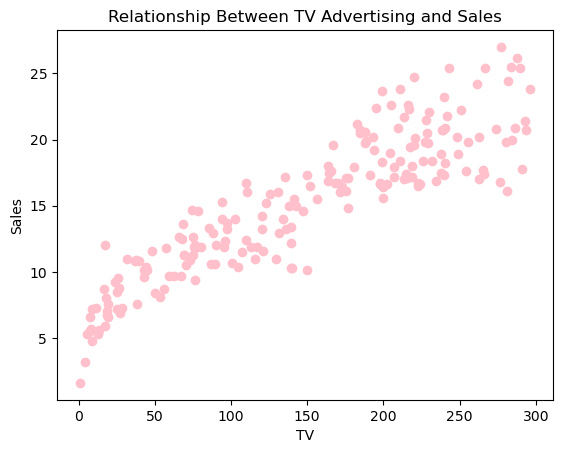

In [44]:
plt.xlabel("TV")
plt.ylabel("Sales")
plt.title("Relationship Between TV Advertising and Sales")
plt.scatter(df.TV,df.Sales,color="pink")
plt.show()

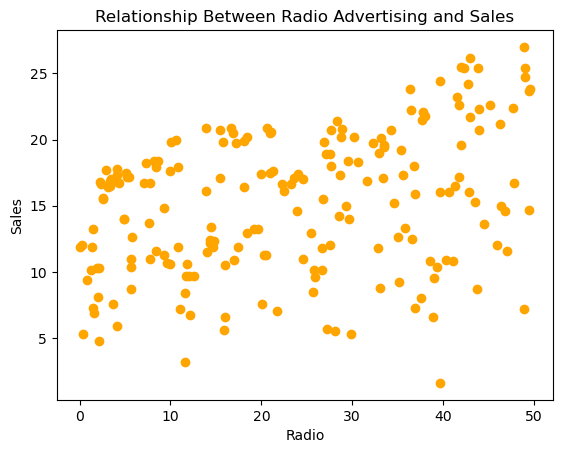

In [31]:
plt.xlabel("Radio")
plt.ylabel("Sales")
plt.title("Relationship Between Radio Advertising and Sales")
plt.scatter(df.Radio,df.Sales,color="orange")
plt.show()

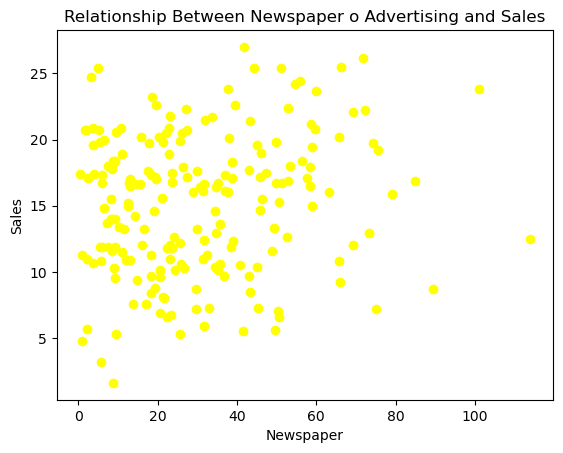

In [33]:
plt.xlabel("Newspaper")
plt.ylabel("Sales")
plt.title("Relationship Between Newspaper o Advertising and Sales")
plt.scatter(df.Newspaper,df.Sales,color="yellow")
plt.show()

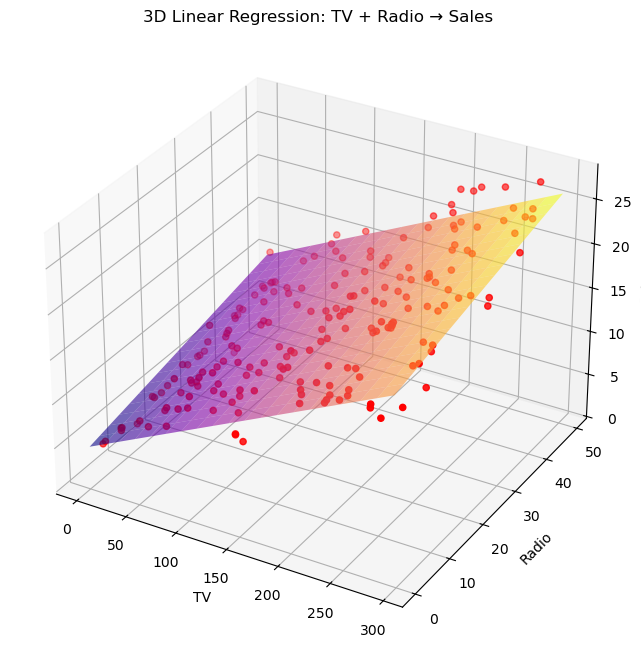

In [82]:
from mpl_toolkits.mplot3d import Axes3D

tv_range = np.linspace(X["TV"].min(), X["TV"].max(), 20)
radio_range = np.linspace(X["Radio"].min(), X["Radio"].max(), 20)
tv_grid, radio_grid = np.meshgrid(tv_range, radio_range)


X_grid = np.c_[tv_grid.ravel(), radio_grid.ravel()]


sales_pred = reg.predict(X_grid)


sales_grid = sales_pred.reshape(tv_grid.shape)


fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')


ax.plot_surface(tv_grid, radio_grid, sales_grid, cmap='plasma', alpha=0.6)


ax.scatter(X["TV"], X["Radio"], y, color='red')


ax.set_xlabel("TV")
ax.set_ylabel("Radio")
ax.set_zlabel("Sales")

plt.title("3D Linear Regression: TV + Radio → Sales")
plt.show()

#Only TV and Radio were used for the 3D plot because there is a limit of three dimensions.